# Project Notebook 
## By : Sanchana Mohankumar
## Topic : Incident Management
### Notebook : Data Analysis

# Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from typing import Dict, Any, List, Tuple
from sklearn.base import clone


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate

# Data File

In [2]:
data = pd.read_csv("/Users/sanchana/Downloads/incident_event_log.csv")

# Getting Insights about Dataset 

In [3]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### Checking for Duplicates

In [4]:
data.shape

(141712, 36)

In [5]:
data = data.drop_duplicates()
data.shape

(141712, 36)

In [6]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

### Checking for unique values

In [8]:
 data.nunique()

number                     24918
incident_state                 9
active                         2
reassignment_count            28
reopen_count                   9
sys_mod_count                115
made_sla                       2
caller_id                   5245
opened_by                    208
opened_at                  19849
sys_created_by               186
sys_created_at             11553
sys_updated_by               846
sys_updated_at             50664
contact_type                   5
location                     225
category                      59
subcategory                  255
u_symptom                    526
cmdb_ci                       51
impact                         3
urgency                        3
priority                       4
assignment_group              79
assigned_to                  235
knowledge                      2
u_priority_confirmation        2
notify                         2
problem_id                   253
rfc                          182
vendor    

### Handling Missing Values

In [9]:
data.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

# Exploratory Data Analysis

## What is the split of Incident state and number of Incidents yet to be closed?

Text(0, 0.5, 'Incident state')

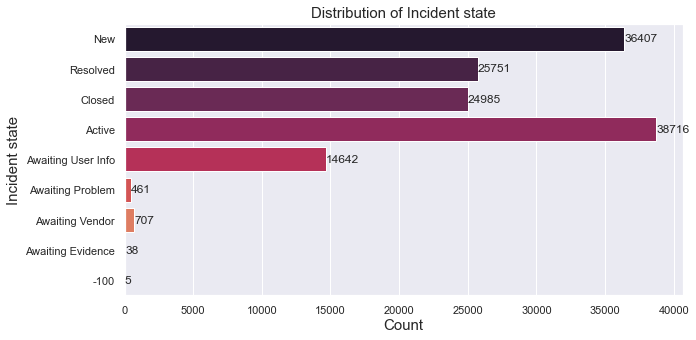

In [10]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.countplot(y ='incident_state', data = data, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Incident state', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Incident state", fontsize = 15)

 ## How many tickets have missed the SLA ?

Text(0, 0.5, 'Made sla')

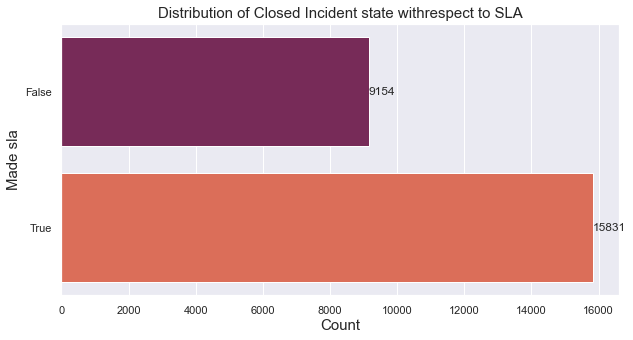

In [11]:
sla = data[data['incident_state'] == 'Closed']
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.countplot(y ='made_sla', data = sla, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Closed Incident state withrespect to SLA', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Made sla", fontsize = 15)

## What category code is getting closed more?

Text(0, 0.5, 'Closed Code')

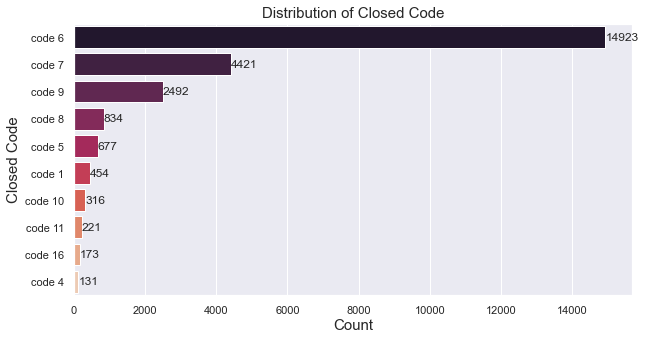

In [12]:
closed_code = pd.DataFrame(sla['closed_code'].value_counts().reset_index().head(10))
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x = 'closed_code',y ='index', data = closed_code, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Closed Code', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Closed Code", fontsize = 15)

## When to send notification and why?

Text(0, 0.5, 'Closed Code')

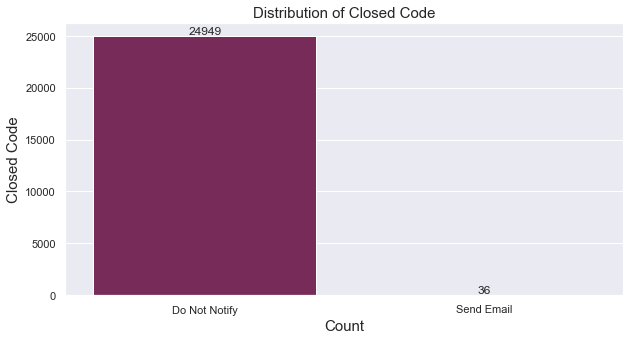

In [13]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.countplot(x = 'notify', data = sla, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Closed Code', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Closed Code", fontsize = 15)

## Who opened the maximum number of Incidents?

Text(0, 0.5, 'Opened by')

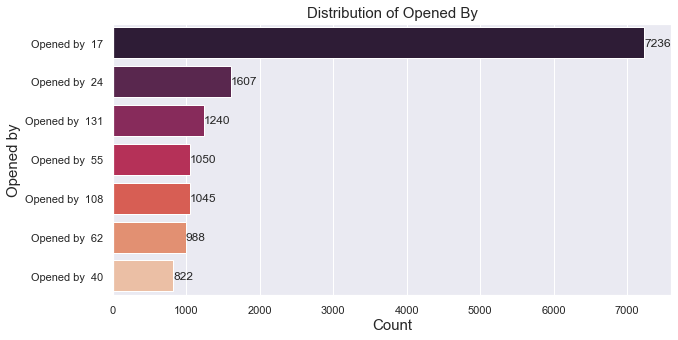

In [14]:
opened_by = pd.DataFrame(sla['opened_by'].value_counts().reset_index().head(7))
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x = 'opened_by',y ='index', data = opened_by, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Opened By', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Opened by", fontsize = 15)

## Who resolved maximum number of Incidents?

Text(0, 0.5, 'Opened by')

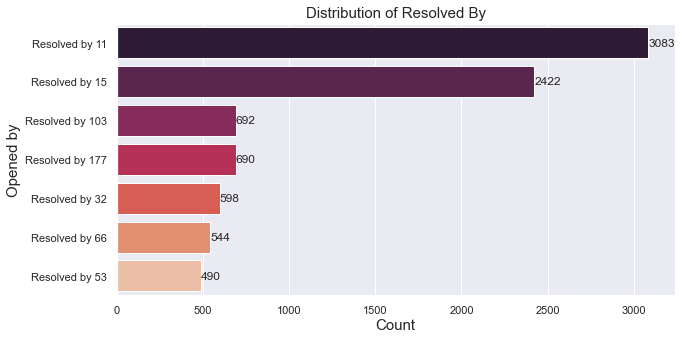

In [15]:
resolved_by = pd.DataFrame(sla['resolved_by'].value_counts().reset_index().head(7))
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.barplot(x = 'resolved_by',y ='index', data = resolved_by, palette = 'rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Resolved By', fontsize = 15)
ax.set_xlabel("Count", fontsize = 15)
ax.set_ylabel("Opened by", fontsize = 15)

### Converting Column Open Date Time and Column Closed Date Time 

In [16]:
sla['opened_date_time'] = pd.to_datetime(sla['opened_at'])
sla['Open_Date'] = sla['opened_date_time'].dt.date
sla['Open_time'] = sla['opened_date_time'].dt.time

sla['closed_date_time'] = pd.to_datetime(sla['closed_at'])
sla['closed_Date'] = sla['closed_date_time'].dt.date
sla['closed_time'] = sla['closed_date_time'].dt.time

/var/folders/70/dlcm7gbd3xdgyms689ttsvjr0000gn/T/ipykernel_40342/522815405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sla['opened_date_time'] = pd.to_datetime(sla['opened_at'])
/var/folders/70/dlcm7gbd3xdgyms689ttsvjr0000gn/T/ipykernel_40342/522815405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sla['Open_Date'] = sla['opened_date_time'].dt.date
/var/folders/70/dlcm7gbd3xdgyms689ttsvjr0000gn/T/ipykernel_40342/522815405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

## What date is Incidents opened and closed ?

In [17]:
date_open = pd.DataFrame(sla['Open_Date'].value_counts().reset_index())
date_close = pd.DataFrame(sla['closed_Date'].value_counts().reset_index())

In [18]:
date_open.head()

,index,Open_Date
0,2016-07-03,608
1,2016-03-28,500
2,2016-02-05,478
3,2016-02-03,469
4,2016-03-14,460


Text(0, 0.5, 'Incident Count')

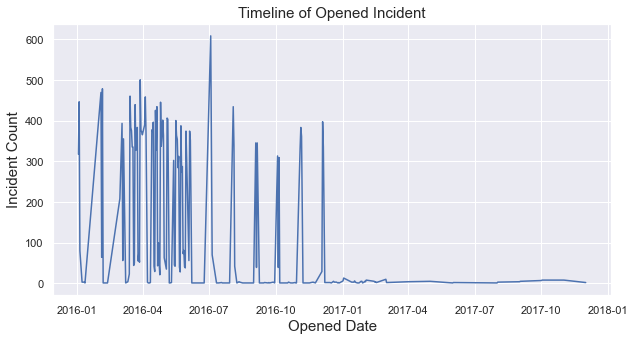

In [19]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.lineplot(x = 'index', y = 'Open_Date', data = date_open)
ax.set_title('Timeline of Opened Incident', fontsize = 15)
ax.set_xlabel("Opened Date", fontsize = 15)
ax.set_ylabel("Incident Count", fontsize = 15)

In [20]:
date_close.head(5)

,index,closed_Date
0,2016-03-24,3114
1,2016-05-23,523
2,2016-03-27,490
3,2016-10-04,485
4,2016-04-30,473


Text(0, 0.5, 'Incident Count')

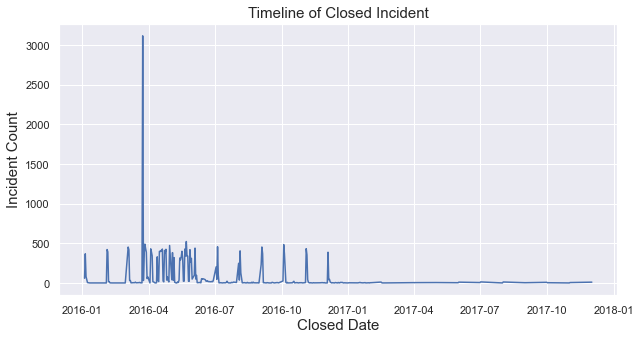

In [21]:
sns.set(rc={"figure.figsize":(10, 5)})
ax = sns.lineplot(x = 'index', y = 'closed_Date', data = date_close)
ax.set_title('Timeline of Closed Incident', fontsize = 15)
ax.set_xlabel("Closed Date", fontsize = 15)
ax.set_ylabel("Incident Count", fontsize = 15)

## Data Preprocessing and Cleaning


In [22]:
data.head(2)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00


### Replacing ? with nan values

In [23]:
data = data.replace('?', np.nan)

### Columns with nan values

In [24]:
data.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

### Columns to drop 
1. problem_id
2. rfc
3. vendor
4. caused_by
5. cmdb_ci

In [25]:
data = data.drop(['problem_id','rfc','vendor', 'caused_by','cmdb_ci',  'resolved_at'], axis = 1)

In [26]:
data.shape

(141712, 30)

In [27]:
data = data.dropna()

In [28]:
data.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
closed_code                0
resolved_by                0
closed_at                  0
dtype: int64

In [29]:
data.shape

(53599, 30)

In [30]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,53599.000000,53599.000000,53599.000000
mean,1.066419,0.019888,5.683110
std,1.580764,0.201343,8.926393
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,7.000000
max,20.000000,6.000000,117.000000


/var/folders/70/dlcm7gbd3xdgyms689ttsvjr0000gn/T/ipykernel_40342/1581148269.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


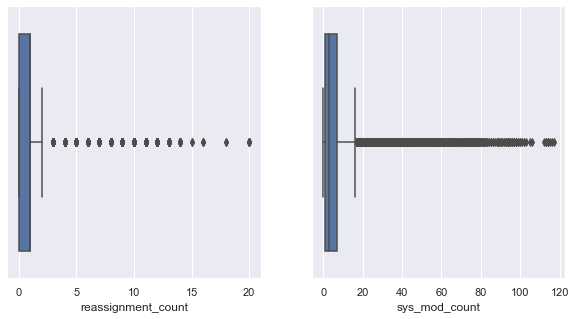

In [31]:
#Plots to verify outliers 
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(x= 'reassignment_count', data=data, ax=axs[0])
sns.boxplot(x= 'sys_mod_count', data=data, ax=axs[1])
fig.show()

In [32]:
incident = data

In [33]:
categorial_col = data.drop(['reassignment_count','reopen_count','sys_mod_count'], axis = 1)
categorial_col.head(2)

,number,incident_state,active,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
4,INC0000047,New,True,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,...,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,6/3/2016 10:00
5,INC0000047,Active,True,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,...,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,code 5,Resolved by 81,6/3/2016 10:00


In [34]:
categorial_col.iloc[:,10:].describe()

,sys_updated_at,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
count,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599,53599
unique,28133,3,167,53,208,475,3,3,4,71,201,2,2,2,16,162,1442
top,24/3/2016 19:01,Phone,Location 204,Category 46,Subcategory 174,Symptom 491,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 194,False,False,Do Not Notify,code 6,Resolved by 177,24/3/2016 19:00
freq,174,53041,11473,8071,13554,26534,50598,50577,49862,6561,2773,45818,39117,53592,38983,2892,1090


#### Checking for duplicates 

In [35]:
incident.duplicated().sum()

0

### Extracted numeric values from string

In [36]:
# Extracted numeric value from these columns
extract_numerics = ['caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'category', 'subcategory','u_symptom', 'impact','urgency', 'priority', 'assignment_group', 'assigned_to','closed_code', 'resolved_by','number' ]
for feature in extract_numerics:
    incident[feature] = incident[feature].str.extract('(\d+)')

In [37]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
4,0000047,New,True,0,0,0,True,2403,397,29/2/2016 04:40,...,2,3,70,89,True,False,Do Not Notify,5,81,6/3/2016 10:00
5,0000047,Active,True,1,0,1,True,2403,397,29/2/2016 04:40,...,2,3,24,31,True,False,Do Not Notify,5,81,6/3/2016 10:00
6,0000047,Active,True,1,0,2,True,2403,397,29/2/2016 04:40,...,2,3,24,31,True,False,Do Not Notify,5,81,6/3/2016 10:00
7,0000047,Active,True,1,0,3,True,2403,397,29/2/2016 04:40,...,2,3,24,31,True,False,Do Not Notify,5,81,6/3/2016 10:00
8,0000047,Active,True,1,0,4,True,2403,397,29/2/2016 04:40,...,2,3,24,31,True,False,Do Not Notify,5,81,6/3/2016 10:00


### Convert date column to datetime format from object and then to epoch value

In [38]:
# converted these columns to datetimeformat
convert_datetime = ['opened_at', 'sys_created_at', 'sys_updated_at','closed_at']
for feature in convert_datetime:
    incident[feature] = pd.to_datetime(incident[feature])

In [39]:
# Convert these time column to epoch time 
convert_to_epoch = ['opened_at', 'sys_created_at','sys_updated_at','closed_at']
for feature in convert_to_epoch :
    incident[feature] = (incident[feature] - dt.datetime(1970,1,1)).dt.total_seconds()

In [40]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
4,0000047,New,True,0,0,0,True,2403,397,1.456721e+09,...,2,3,70,89,True,False,Do Not Notify,5,81,1.464948e+09
5,0000047,Active,True,1,0,1,True,2403,397,1.456721e+09,...,2,3,24,31,True,False,Do Not Notify,5,81,1.464948e+09
6,0000047,Active,True,1,0,2,True,2403,397,1.456721e+09,...,2,3,24,31,True,False,Do Not Notify,5,81,1.464948e+09
7,0000047,Active,True,1,0,3,True,2403,397,1.456721e+09,...,2,3,24,31,True,False,Do Not Notify,5,81,1.464948e+09
8,0000047,Active,True,1,0,4,True,2403,397,1.456721e+09,...,2,3,24,31,True,False,Do Not Notify,5,81,1.464948e+09


## Categorical columns

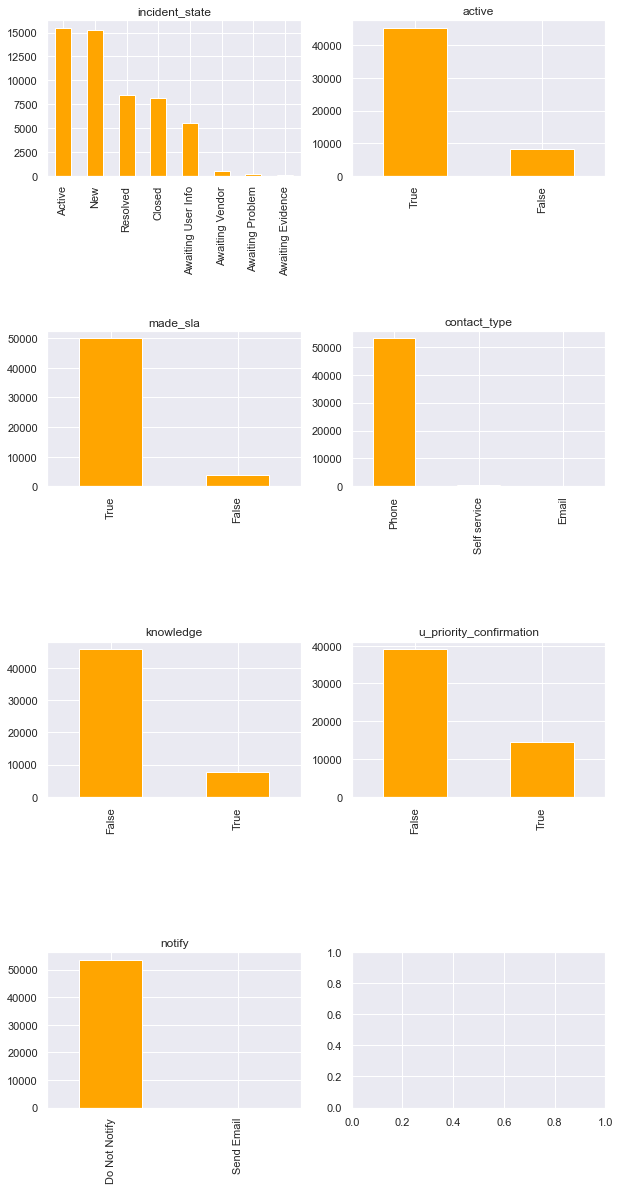

In [41]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (10,20))
objList = ['incident_state', 'active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation', 'notify' ]
for i, objList in enumerate(objList):
    ax = plt.subplot(4,2,i+1)
    ax = incident[objList].value_counts().plot(kind='bar', color = 'orange')
    ax.set_title(objList)
    
plt.subplots_adjust(hspace=1)
plt.show()

## Encoding 

In [43]:
#Performed Label Encoding
objList = ['incident_state', 'active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation', 'notify' ]
for feature in objList:
    incident[feature] = le.fit_transform(incident[feature])

In [44]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
4,0000047,6,1,0,0,0,1,2403,397,1.456721e+09,...,2,3,70,89,1,0,0,5,81,1.464948e+09
5,0000047,0,1,1,0,1,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
6,0000047,0,1,1,0,2,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
7,0000047,0,1,1,0,3,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
8,0000047,0,1,1,0,4,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09


###  Converting following column to numeric feature

In [45]:
numeric_list = ['number', 'incident_state', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by','contact_type','location','category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group','assigned_to','notify', 'closed_code','resolved_by'] 
for feature in numeric_list:
    incident[feature] = pd.to_numeric(incident[feature])

In [46]:
incident.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
4,47,6,1,0,0,0,1,2403,397,1.456721e+09,...,2,3,70,89,1,0,0,5,81,1.464948e+09
5,47,0,1,1,0,1,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
6,47,0,1,1,0,2,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
7,47,0,1,1,0,3,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
8,47,0,1,1,0,4,1,2403,397,1.456721e+09,...,2,3,24,31,1,0,0,5,81,1.464948e+09
